In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/Brain _Tumor_Detection-20231122T061951Z-001.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
dataset_dir = '/content/drive/MyDrive/Brain _Tumor_Detection'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

test_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.2)

training_set=train_datagen.flow_from_directory(
         '/content/drive/MyDrive/Brain _Tumor_Detection',
          target_size=(128,128),
          batch_size=32,
          class_mode='binary',
          subset='training')

test_set=test_datagen.flow_from_directory(
         '/content/drive/MyDrive/Brain _Tumor_Detection',
          target_size=(128,128),
          batch_size=32,
          class_mode='binary',
          subset='validation')

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
import tqdm
import numpy as np
training_set.reset()
X_train, y_train = next(training_set)
for i in tqdm.tqdm(range(int(training_set.n/32)-1)):
  img, label = next(training_set)
  X_train = np.append(X_train, img, axis=0 )
  y_train = np.append(y_train, label, axis=0)
print(X_train.shape, y_train.shape)

100%|██████████| 74/74 [10:16<00:00,  8.33s/it]

(2400, 128, 128, 3) (2400,)


In [ ]:
test_set.reset()
X_test, y_test = next(test_set)
for i in tqdm.tqdm(range(int(test_set.n/32)-1)):
  img, label = next(test_set)
  X_test = np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

100%|██████████| 17/17 [02:16<00:00,  8.05s/it]

(576, 128, 128, 3) (576,)


In [ ]:
#CNN
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(128, 128,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 63, 63, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 28800)             0         
                                                                 
 dropout_12 (Dropout)        (None, 28800)           

In [ ]:
#from Ipython.display import display
from PIL import Image
hist=model.fit(
    training_set,
    steps_per_epoch=training_set.samples//32,
    epochs=100,
    validation_data=test_set,
    validation_steps=test_set.samples//32)

Epoch 1/100
75/75 [==============================] - 19s 238ms/step - loss: 0.5530 - accuracy: 0.7179 - val_loss: 0.4473 - val_accuracy: 0.8056
Epoch 2/100
75/75 [==============================] - 19s 251ms/step - loss: 0.4294 - accuracy: 0.8150 - val_loss: 0.3489 - val_accuracy: 0.8594
Epoch 3/100
75/75 [==============================] - 18s 245ms/step - loss: 0.3876 - accuracy: 0.8379 - val_loss: 0.3157 - val_accuracy: 0.8681
Epoch 4/100
75/75 [==============================] - 18s 246ms/step - loss: 0.3492 - accuracy: 0.8483 - val_loss: 0.2991 - val_accuracy: 0.8715
Epoch 5/100
75/75 [==============================] - 18s 243ms/step - loss: 0.3186 - accuracy: 0.8708 - val_loss: 0.2744 - val_accuracy: 0.9062
Epoch 6/100
75/75 [==============================] - 18s 234ms/step - loss: 0.3159 - accuracy: 0.8629 - val_loss: 0.2252 - val_accuracy: 0.9028
Epoch 7/100
75/75 [==============================] - 17s 228ms/step - loss: 0.2875 - accuracy: 0.8742 - val_loss: 0.2388 - val_accuracy:

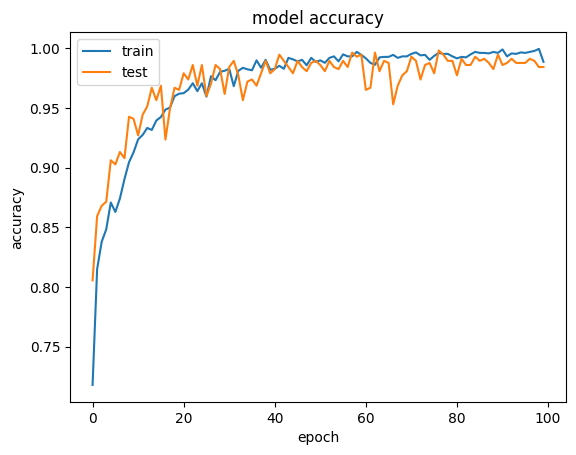

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

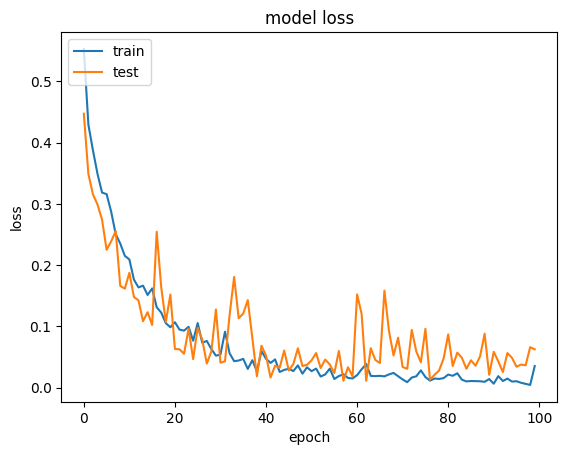

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# preduction
y_pred = model.predict(X_test)
# extract the predicted probabilities
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))
# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

18/18 [==============================] - 0s 5ms/step
[0.   0.   1.   1.   1.   0.   0.   1.   0.   0.96 1.   0.01 1.   0.99
 0.   0.   0.99 1.   1.   1.   1.   0.6  0.   0.   1.   0.   0.   0.01
 1.   0.   1.   0.   1.   1.   0.   1.   0.18 1.   0.   1.   0.   0.
 1.   1.   1.   0.   0.   0.   1.   1.   1.   1.   0.   0.   0.   0.
 0.   0.   1.   1.   0.   0.06 0.   0.   0.   1.   0.   1.   0.   1.
 1.   1.   1.   0.   0.   1.   0.02 0.   0.   0.   1.   1.   1.   0.
 0.   0.   1.   0.   0.   0.   1.   0.   1.   0.   0.   0.97 1.   1.
 0.   1.   1.   0.   1.   0.   1.   1.   0.   1.   1.   0.   1.   0.
 0.03 1.   0.98 0.   1.   0.6  0.32 1.   0.   1.   0.   1.   0.   0.
 0.   0.01 0.   1.   0.   0.   1.   0.98 0.53 1.   1.   1.   0.   0.
 1.   1.   1.   1.   0.   1.   1.   0.   0.   1.   1.   0.   1.   1.
 1.   1.   0.   0.   0.   0.   1.   1.   1.   0.   0.   0.   1.   1.
 1.   0.   0.   0.   0.   0.   0.   1.   0.   1.   0.   0.   0.   1.
 1.   1.   0.   0.   0.   1.   1.   1.   0.   

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, y_pred))

[[284   3]
 [  6 283]]


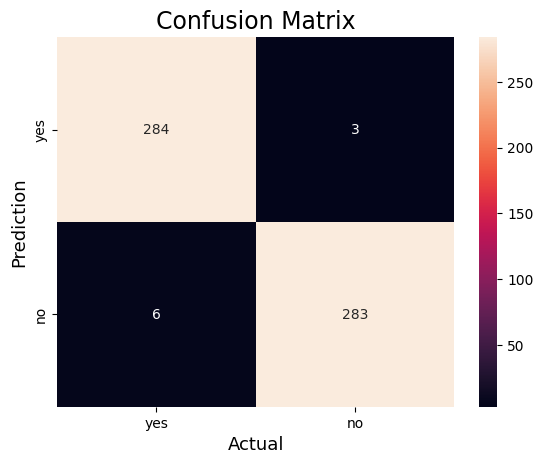

Accuracy   : 0.984375
Precision : 0.9895104895104895
Recall    : 0.9792387543252595
F1-score  : 0.9843478260869565


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['yes', 'no'],
            yticklabels=['yes', 'no'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
def hist1(cnn_model):
  opt=keras.optimizers.Adam(learning_rate=0.001)
  cnn_model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
  his=cnn_model.fit(X_train, y_train, epochs=20, batch_size=32,verbose=1, validation_data=(X_test, y_test), shuffle=True)
  result=his.history['val_accuracy']
  return max(result)

def fit(x):
  par1=x
  #print(par1)
  cnn_model = Sequential()
  cnn_model.add(Conv2D(par1[3], (3,3), activation='relu', input_shape=(128, 128,3)))
  cnn_model.add(MaxPool2D((2,2)))
  cnn_model.add(Conv2D(par1[3], (3,3), activation='relu'))
  cnn_model.add(MaxPool2D((2,2)))
  cnn_model.add(Dropout(par1[1]))
  cnn_model.add(Flatten())
  cnn_model.add(Dense(par1[2], activation='relu'))
  cnn_model.add(Dense(1, activation='sigmoid'))
  opt=keras.optimizers.Adam(learning_rate=par1[0])

  result=hist1(cnn_model)
  return result*100

def findgbest(lbest, fit):
  gbest=0
  loc=fit.index(max(fit))
  gbest=lbest[loc]
  return gbest

In [ ]:

 #FireFly algorithm
from zipfile import ZipFile as zipfile
import random
from math import e, pow
#import fireflymodule as ffm
from scipy.spatial import distance

def subtra(x,y):
  diff=[]
  zip1=zip(x,y)
  for i, j in zip1:
    diff.append(abs(i-j))
  return diff

def sum1(x,y):
  add1=[]
  zip1=zip(x,y)
  for i, j in zip1:
    add1.append(abs(i-j))
  return add1

ipos=[]
gbestresult=[]
accuracy=[]
alpha1=1.2
gamma=1.2
ep=random.uniform(0,1)
n=int(input("Enter the population size"))

#First intializing the position
for i in range(0,n):
  lrate=random.uniform(0,1)
  drate=random.uniform(0,0.5)
  nh1=random.randint(10,100)
  nn=random.randint(16,64)
  ipos.insert(i,[lrate,drate,nh1,nn])

itr=1
while 1:
  fitness1=[]
  for k in range(0, n):
    print(f"Processing ipos[{k}]: {ipos[k]}")
    try:
        f = fit(ipos[k])
        fitness1.insert(k, f)
    except ValueError as e:
        print(f"Error in fit function: {e}")

  #for k in range(0,n):
    #f=fit(ipos[k])
    #fitness1.insert(k,f)

  fitness_copy=fitness1
  Z=[x for _, x in sorted(zip(fitness1, ipos))]
  fitness1.sort()

  gbest=findgbest(Z,fitness1)
  acc=max(fitness1)

  for i in range(0,n-1):
    for j in range(i+1,n):
      if fitness1[j]>fitness1[i]:
        dist=abs(distance.euclidean(Z[i],Z[j]))
        dist=dist**2
        beta=fitness1[j]*pow(e,-(gamma*dist))
        temp1=subtra(Z[j],Z[i])
        temp2=[ele*beta for ele in temp1]
        temp3=alpha1*(ep-0.5)
        x_temp=sum1(Z[i],temp2)
        x_temp=[ele1+temp3 for ele1 in x_temp]

        nextpos=x_temp
        for k in range(0,len(nextpos)):
          if k==0:
            nextpos[k]=int(nextpos[k])
            if nextpos[k] < 0 or nextpos[k] > 1:
              pos1=random.randint(0,1)
              nextpos[k]=pos1

          if k==1:
            if nextpos[k] < 0 or nextpos[k] > 0.5:
              pos1=random.uniform(0, 0.5)
              nextpos[k]=pos1

          if k==2:
            nextpos[k]=int(nextpos[k])
            if nextpos[k] < 10 or nextpos[k] > 100:
              pos1=random.randint(10, 100)
              nextpos[k]=pos1

          if k==3:
            if nextpos[k] < 16 or nextpos[k] > 64:
              pos1=random.uniform(0, 1)
              nextpos[k]=pos1



        x_temp=nextpos
        Z[i]=x_temp
      else:
        tem=alpha1*(ep-0.5)
        x_tem=[el1+tem for el1 in Z[-1]]
        nextpos=x_tem
        for k in range(0, len(nextpos)):

          if k==0:
            nextpos[k]=int(nextpos[k])
            if nextpos[k] < 0 or nextpos[k] > 1:
              pos1=random.randint(0,1)
              nextpos[k]=pos1

          if k==1:
            if nextpos[k] < 0 or nextpos[k] > 0.5:
              pos1=random.uniform(0, 0.5)
              nextpos[k]=pos1

          if k==2:
            nextpos[k]=int(nextpos[k])
            if nextpos[k] < 10 or nextpos[k] > 100:
              pos1=random.randint(10, 100)
              nextpos[k]=pos1

          if k==3:
            if nextpos[k] < 16 or nextpos[k] > 64:
              pos1=random.uniform(0, 1)
              nextpos[k]=pos1


        x_tem=nextpos
        Z[-1]=x_tem

  ipos=Z
  itr+=1
  print("iteration", itr)
  accuracy.append(acc)
  gbestresult.append(gbest)
  print(accuracy)
  print(gbestresult)
  if itr>5:
    break

Processing ipos[0]: [0.8498279878681835, 0.36981870029640257, 57, 23]
Epoch 1/20
75/75 [==============================] - 54s 697ms/step - loss: 0.2045 - accuracy: 0.6875 - val_loss: 0.1825 - val_accuracy: 0.7240
Epoch 2/20
75/75 [==============================] - 54s 714ms/step - loss: 0.1380 - accuracy: 0.8025 - val_loss: 0.1515 - val_accuracy: 0.8021
Epoch 3/20
75/75 [==============================] - 50s 669ms/step - loss: 0.1105 - accuracy: 0.8537 - val_loss: 0.1377 - val_accuracy: 0.7986
Epoch 4/20
75/75 [==============================] - 52s 687ms/step - loss: 0.0948 - accuracy: 0.8758 - val_loss: 0.1047 - val_accuracy: 0.8628
Epoch 5/20
75/75 [==============================] - 52s 700ms/step - loss: 0.0722 - accuracy: 0.9108 - val_loss: 0.0978 - val_accuracy: 0.8733
Epoch 6/20
75/75 [==============================] - 55s 732ms/step - loss: 0.0554 - accuracy: 0.9300 - val_loss: 0.0813 - val_accuracy: 0.9097
Epoch 7/20
75/75 [==============================] - 55s 733ms/step - los

Epoch 1/100
75/75 [==============================] - 3s 27ms/step - loss: 0.8953 - accuracy: 0.6417 - val_loss: 0.4976 - val_accuracy: 0.7656
Epoch 2/100
75/75 [==============================] - 2s 21ms/step - loss: 0.4844 - accuracy: 0.7679 - val_loss: 0.4619 - val_accuracy: 0.7882
Epoch 3/100
75/75 [==============================] - 2s 21ms/step - loss: 0.3863 - accuracy: 0.8308 - val_loss: 0.5001 - val_accuracy: 0.7639
Epoch 4/100
75/75 [==============================] - 2s 22ms/step - loss: 0.3340 - accuracy: 0.8500 - val_loss: 0.4799 - val_accuracy: 0.8264
Epoch 5/100
75/75 [==============================] - 2s 22ms/step - loss: 0.2519 - accuracy: 0.8958 - val_loss: 0.5330 - val_accuracy: 0.7517
Epoch 6/100
75/75 [==============================] - 2s 22ms/step - loss: 0.1773 - accuracy: 0.9325 - val_loss: 0.5570 - val_accuracy: 0.8073
Epoch 7/100
75/75 [==============================] - 2s 23ms/step - loss: 0.2054 - accuracy: 0.9196 - val_loss: 0.6181 - val_accuracy: 0.8003
Epoch 

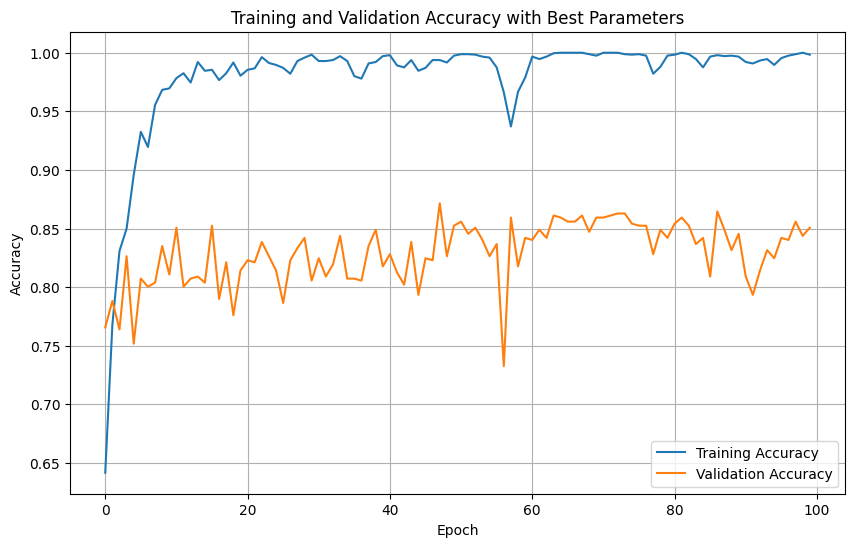

In [ ]:
# ... (your Firefly algorithm code)

# After the Firefly algorithm optimization

# Get the best parameters obtained from the Firefly algorithm
best_parameters = [0.01, 0.03302167204558626, 83, 55.01539469987543]

# Create a neural network with the best parameters
best_cnn_model = Sequential()
best_cnn_model.add(Conv2D(best_parameters[3], (3, 3), activation='relu', input_shape=(128, 128, 3)))
best_cnn_model.add(MaxPool2D((2, 2)))
best_cnn_model.add(Conv2D(best_parameters[3], (3, 3), activation='relu'))
best_cnn_model.add(MaxPool2D((2, 2)))
best_cnn_model.add(Flatten())
best_cnn_model.add(Dropout(best_parameters[1]))
best_cnn_model.add(Dense(best_parameters[2], activation='relu'))
best_cnn_model.add(Dense(1, activation='sigmoid'))
best_opt = keras.optimizers.Adam(learning_rate=best_parameters[0])
best_cnn_model.compile(loss='binary_crossentropy', optimizer=best_opt, metrics=['accuracy'])

# Train the model with the best parameters
best_history = best_cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test), shuffle=True)

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy with Best Parameters')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


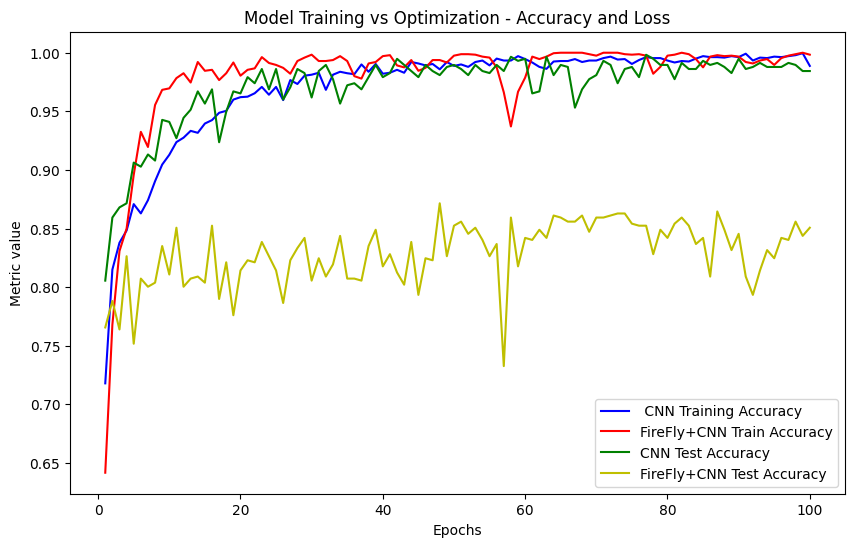

In [ ]:
import matplotlib.pyplot as plt

def plot_combined_history(hist, best_history):
    epochs_model = range(1, len(hist.history['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Plotting Accuracy
    plt.plot(epochs_model, hist.history['accuracy'], 'b', label=' CNN Training Accuracy')
    plt.plot(epochs_model, best_history.history['accuracy'], 'r', label='FireFly+CNN Train Accuracy')

    # Plotting Accuracy
    plt.plot(epochs_model, hist.history['val_accuracy'], 'g', label='CNN Test Accuracy')
    plt.plot(epochs_model, best_history.history['val_accuracy'], 'y', label='FireFly+CNN Test Accuracy')

    # Plotting Loss
    #plt.plot(epochs_model, hist.history['loss'], 'g', label='Training Loss')
    #plt.plot(epochs_model, best_history.history['loss'], 'y', label='Optimization Loss')

    # Plotting Loss
    #plt.plot(epochs_model, hist.history['val_loss'], 'g', label='Test Loss')
    #plt.plot(epochs_model, best_history.history['val_loss'], 'y', label='Optimization Loss')


    plt.title('Model Training vs Optimization - Accuracy and Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Metric value')
    plt.legend()
      # Set y-axis limit to 1.00
    #plt.ylim(0, 1.0)

    plt.show()


plot_combined_history(hist, best_history)

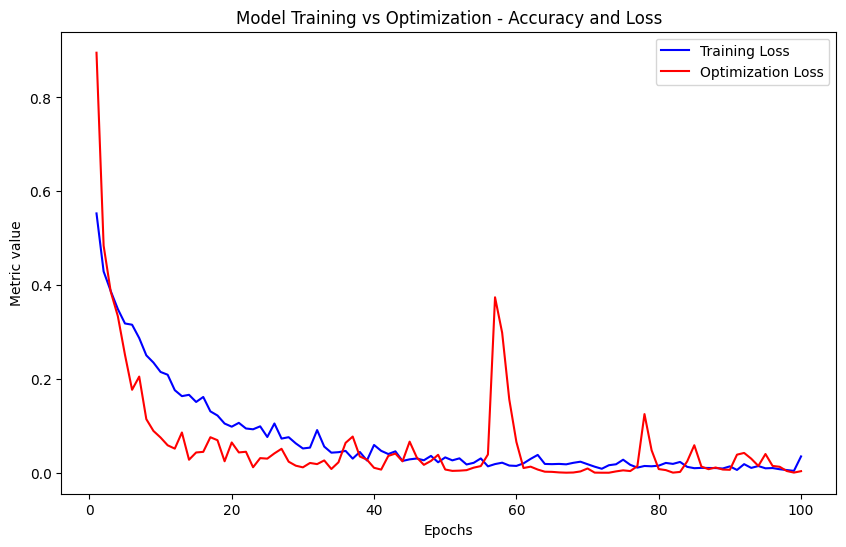

In [ ]:
import matplotlib.pyplot as plt

def plot_combined_history(hist, best_history):
    epochs_model = range(1, len(hist.history['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Plotting Accuracy
    #plt.plot(epochs_model, hist.history['accuracy'], 'b', label=' CNN Training Accuracy')
   # plt.plot(epochs_model, best_history.history['accuracy'], 'r', label='FireFly+CNN Accuracy')

    # Plotting Accuracy
    #plt.plot(epochs_model, hist.history['val_accuracy'], 'g', label='CNN Test Accuracy')
    #plt.plot(epochs_model, best_history.history['val_accuracy'], 'y', label='FireFly+CNN Accuracy')

    # Plotting Loss
    plt.plot(epochs_model, hist.history['loss'], 'b', label='Training Loss')
    plt.plot(epochs_model, best_history.history['loss'], 'r', label='Optimization Loss')

    # Plotting Loss
    #plt.plot(epochs_model, hist.history['val_loss'], 'g', label='Test Loss')
   # plt.plot(epochs_model, best_history.history['val_loss'], 'y', label='Optimization Loss')


    plt.title('Model Training vs Optimization - Accuracy and Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Metric value')
    plt.legend()
      # Set y-axis limit to 1.00
   # plt.ylim(0)

    plt.show()


plot_combined_history(hist, best_history)

In [ ]:
# Plot training and validation accuracy
def plot_accuracy(hist1):
    plt.figure(figsize=(10, 6))
    plt.plot(hist1.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(hist1.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Training and Validation Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return max(hist1.history['val_accuracy'])

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
# preduction
y_pred = model.predict(X_test)
# extract the predicted probabilities
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))
# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['yes', 'no'],
            yticklabels=['yes', 'no'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)